In [ ]:
                                                        AUSTRALIAN RAINS

>> OPERATIONS PERFORMED :
    
    > Downloading a real-world dataset from Kaggle
    
    >Splitting a dataset into training, validation & test sets
    
    >Imputing and scaling numeric features
    
    >Encoding categorical columns as one-hot vectors
    
    >Training a logistic regression model using Scikit-learn
    
    >Evaluating a model using a validation set and test set

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

pd.pandas.set_option('display.max_columns' , None)

In [2]:
import opendatasets as od 

download_url = 'https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv'
od.download(download_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [3]:
df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

                                                    DATA WRANGLING

In [6]:
#check for missing values 

def missing_values(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total / len(df)) * 100
    return pd.concat((total , percent ) , axis = 1  , keys = ['TOTAL' , 'PERCENT'])

miss_values = missing_values(df)
miss_values

,TOTAL,PERCENT
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [7]:
#we can see that our target variable rain today and rain tommorrow and we need to drop the empty rows 

df.dropna(subset = ['RainToday' , 'RainTomorrow'] , inplace = True)

In [8]:
numeric_cols = df.select_dtypes(include = np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [9]:
#imputing the missing values in numeric columns using simple imputer 

from sklearn.impute import SimpleImputer

imputer = SimpleImputer( strategy = 'mean')
imputer.fit(df[numeric_cols])
df[numeric_cols] = imputer.transform(df[numeric_cols])

In [10]:
imputer2 = SimpleImputer(strategy = 'most_frequent')
imputer2.fit(df[categorical_cols])
df[categorical_cols] = imputer2.transform(df[categorical_cols])

In [11]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


                                                        MODEL BUILDING

WORKING WITH A SAMPLE :
    
    When working with massive datasets containing millions of rows , its a good idea to work with a sample initially , to quickly set up ur model
    training notebook .

In [13]:
#Taking a sample of 10 percent 

sample_df = df.sample(frac = 0.1 , random_state = 42)
len(sample_df)

14079

TRAINING , VALIDATION & TEST SETS : 

    As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.

In [14]:
from sklearn.model_selection import train_test_split

train_val_df , test_df = train_test_split( sample_df , test_size = 0.2 , random_state = 42)
train_df , val_df  = train_test_split( train_val_df , test_size = 0.25 , random_state = 42)

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (8447, 23)
val_df.shape : (2816, 23)
test_df.shape : (2816, 23)


In [15]:
df.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,4.49925,16.9,21.8,No,No


SINCE THIS DATASET IS BASED ON DATES , IT BETTER TO SEPERATE THE TRAIN , VALIDATION & TEST DATA WITH TIME , SO THAT THE MODEL IS TRAINED ON DATA FROM 
PAST & EVALUATED ON DATA FROM FUTURE .

SO WE WILL CREATE ANOTHER COLUMN FOR EXTRACTING YEAR FROM DATE .

In [16]:
sample_df['Date'] = pd.to_datetime(sample_df['Date'])

<Axes: xlabel='Date', ylabel='count'>

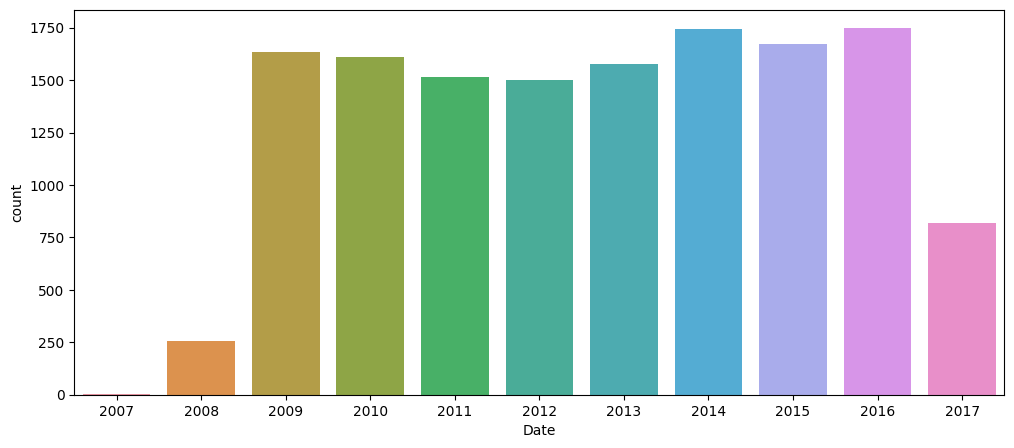

In [17]:
year = sample_df['Date'].dt.year

plt.figure(figsize = (12,5))
sns.countplot(x = year)

Train years - 2007 - 2014 --> Assume this as past / historical data .

validation years - 2015  --> Assume this as present data .

test years - 2016 , 2017 --> Assume this as future dataset ( to predict and compare ) .

In [18]:
train_df = sample_df[year < 2015]
val_df = sample_df[year == 2015]
test_df = sample_df[year > 2015]

In [19]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (9840, 23)
val_df.shape : (1672, 23)
test_df.shape : (2567, 23)


In [20]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
121459,2010-09-30,Perth,18.2,25.0,0.0,9.400000,1.50000,SE,33.00000,SE,SE,9.0,9.0,41.0,34.0,1011.100000,1009.600000,7.000000,7.00000,19.2,24.4,No,No
32051,2013-06-18,Sydney,8.0,19.2,0.0,1.600000,8.00000,S,43.00000,W,S,26.0,17.0,76.0,52.0,1013.500000,1012.200000,1.000000,2.00000,9.6,16.1,No,Yes
109566,2011-09-22,Albany,9.5,14.5,2.4,3.000000,5.30000,W,39.97052,SW,SSW,19.0,9.0,58.0,53.0,1021.600000,1022.300000,6.000000,6.00000,12.2,13.8,Yes,No
78129,2009-05-21,Watsonia,7.6,15.4,0.0,1.600000,5.60000,SW,15.00000,N,SW,0.0,6.0,100.0,78.0,1025.600000,1023.800000,8.000000,1.00000,9.7,14.9,No,No
6517,2010-04-14,Cobar,7.9,22.9,0.0,3.800000,9.20000,WSW,20.00000,SSW,SSE,6.0,9.0,60.0,26.0,1022.900000,1019.900000,6.000000,4.00000,14.4,22.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137516,2013-01-15,AliceSprings,24.3,40.8,0.0,19.600000,11.20000,SSE,39.00000,E,SW,19.0,13.0,25.0,14.0,1010.400000,1006.300000,6.000000,7.00000,31.2,39.6,No,No
10187,2012-03-05,CoffsHarbour,22.4,30.5,0.4,2.200000,6.60000,SSE,50.00000,NNW,NNE,17.0,31.0,71.0,75.0,1012.000000,1009.900000,6.000000,6.00000,26.2,27.2,No,Yes
124014,2009-07-03,SalmonGums,10.1,14.0,0.0,5.472516,7.63054,ENE,19.00000,SE,NNE,6.0,11.0,78.0,67.0,1017.654577,1015.257963,4.431161,4.49925,12.4,13.3,No,No
31551,2011-12-07,Sydney,12.1,22.0,2.2,4.000000,3.20000,ESE,35.00000,WNW,ESE,11.0,24.0,64.0,71.0,1016.300000,1014.000000,4.431161,4.49925,17.7,19.1,Yes,Yes


In [21]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
107700,2015-02-06,Woomera,19.1,38.5,0.0,11.400000,12.80000,ENE,52.0,ESE,NNE,19.0,22.0,21.0,9.0,1017.500000,1014.800000,2.000000,0.00000,25.2,37.0,No,No
26526,2015-09-24,Penrith,8.4,17.5,0.0,5.472516,7.63054,S,54.0,SSW,S,22.0,26.0,47.0,44.0,1017.654577,1015.257963,4.431161,4.49925,13.5,15.4,No,No
48343,2015-08-16,Canberra,0.5,15.3,0.0,5.472516,7.63054,WNW,41.0,WNW,NW,4.0,24.0,86.0,46.0,1028.000000,1021.900000,4.431161,4.49925,7.3,14.9,No,No
72586,2015-04-02,Mildura,15.0,24.0,0.0,8.000000,6.20000,S,43.0,S,SSE,22.0,19.0,57.0,27.0,1021.600000,1021.600000,8.000000,3.00000,15.1,20.8,No,No
119968,2015-08-26,PerthAirport,9.8,21.5,0.0,4.200000,5.70000,ENE,39.0,NE,NNE,15.0,15.0,51.0,29.0,1022.100000,1019.000000,7.000000,7.00000,13.4,20.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,2015-12-31,WaggaWagga,17.1,35.4,0.0,10.000000,11.20000,E,26.0,ENE,NNE,19.0,9.0,35.0,15.0,1016.100000,1012.700000,5.000000,4.00000,26.2,34.5,No,No
98760,2015-06-04,Adelaide,9.4,17.1,0.6,1.200000,7.63054,WSW,48.0,N,WSW,17.0,24.0,67.0,57.0,1017.700000,1017.400000,4.431161,4.49925,11.7,16.2,No,No
44864,2015-07-04,Wollongong,6.1,15.0,0.0,5.472516,7.63054,SW,28.0,WNW,SW,13.0,9.0,55.0,38.0,1022.500000,1020.200000,8.000000,4.49925,8.6,14.9,No,No
74222,2015-05-30,Nhil,6.6,15.9,0.0,5.472516,7.63054,WNW,46.0,NW,W,17.0,22.0,100.0,100.0,1022.300000,1018.900000,4.431161,4.49925,9.0,12.1,No,No


In [22]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
33034,2016-02-26,Sydney,23.2,27.8,0.0,12.200000,5.20000,S,63.0,SSW,SE,28.0,22.0,67.0,60.0,1014.9,1015.5,1.000000,7.00000,25.4,26.7,No,No
83947,2017-04-27,Dartmoor,5.6,15.1,2.2,5.472516,7.63054,WSW,22.0,N,WSW,4.0,7.0,98.0,77.0,1025.9,1024.3,4.431161,4.49925,9.5,14.4,Yes,Yes
105031,2016-01-12,Nuriootpa,20.1,38.7,0.0,11.400000,13.40000,SE,39.0,E,ENE,19.0,9.0,48.0,20.0,1011.3,1009.4,0.000000,4.49925,26.2,36.2,No,No
99233,2016-09-19,Adelaide,6.7,16.4,0.4,5.472516,7.63054,N,31.0,N,N,15.0,15.0,65.0,40.0,1014.4,1010.0,4.431161,4.49925,11.2,15.9,No,No
33024,2016-02-16,Sydney,21.5,27.9,0.0,7.000000,10.80000,SSE,48.0,SSW,SE,17.0,31.0,36.0,51.0,1009.1,1008.8,1.000000,2.00000,25.3,25.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132921,2017-03-08,Hobart,8.9,21.8,0.0,4.000000,11.10000,SE,28.0,NNW,SE,17.0,17.0,70.0,43.0,1024.2,1021.1,1.000000,4.00000,12.8,21.3,No,No
23719,2016-05-13,NorfolkIsland,17.2,22.3,0.2,1.200000,7.63054,SSE,31.0,SSE,SE,15.0,13.0,75.0,61.0,1021.0,1019.9,4.431161,4.49925,20.9,21.0,No,No
83655,2016-07-09,Dartmoor,1.1,13.9,0.4,1.600000,7.63054,E,11.0,E,N,2.0,4.0,98.0,76.0,1025.0,1022.3,4.431161,4.49925,3.4,12.8,No,Yes
36017,2016-01-31,SydneyAirport,18.8,31.8,23.8,5.800000,10.00000,N,43.0,NW,WNW,13.0,22.0,79.0,22.0,1004.3,1003.4,1.000000,5.00000,23.2,30.1,Yes,No


IDENTIFY THE DEPENDENT AND INDEPENDENT COLUMNS

In [23]:
sample_df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
121459,2010-09-30,Perth,18.2,25.0,0.0,9.4,1.5,SE,33.0,SE,SE,9.0,9.0,41.0,34.0,1011.1,1009.6,7.0,7.0,19.2,24.4,No,No
32051,2013-06-18,Sydney,8.0,19.2,0.0,1.6,8.0,S,43.0,W,S,26.0,17.0,76.0,52.0,1013.5,1012.2,1.0,2.0,9.6,16.1,No,Yes
107700,2015-02-06,Woomera,19.1,38.5,0.0,11.4,12.8,ENE,52.0,ESE,NNE,19.0,22.0,21.0,9.0,1017.5,1014.8,2.0,0.0,25.2,37.0,No,No


In [24]:
#seperating the input and target columns 

input_cols = list(sample_df.columns)[1:-1]
target_cols = sample_df.columns[-1]

In [25]:
#creating  inputs & targets for training , validation & test sets .

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [26]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [27]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [28]:
#seperating numeric and categorical values 

num_cols = list(train_inputs.select_dtypes(include = np.number))
categorical_cols = list(train_inputs.select_dtypes('object'))

MIN-MAX SCALING NUMERIC FEATURES :

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(sample_df[num_cols])
train_inputs[num_cols] = scaler.transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.transform(test_inputs[num_cols])

In [30]:
#lets check how many unique values each categorical column has 

df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [31]:
#location - target encoding 
# 16 values one hot encoding 
# rain today binary encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
encoder.fit(df[categorical_cols])

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [33]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 

In [34]:
# we shud generate column names for each individual category .

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [35]:
#encoding the train , test , val 

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/tmp/ipykernel_82/1285881894.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_82/1285881894.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_82/1285881894.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

In [36]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
33034,Sydney,0.793814,0.633010,0.000000,0.196774,0.371429,S,0.486486,SSW,SE,0.337349,0.265060,0.663265,0.595960,0.543672,0.571936,0.125000,0.875000,0.687764,0.634387,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
83947,Dartmoor,0.340206,0.386408,0.008191,0.088266,0.545039,WSW,0.117117,N,WSW,0.048193,0.084337,0.979592,0.767677,0.739750,0.728242,0.553895,0.562406,0.352321,0.391304,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
105031,Nuriootpa,0.713918,0.844660,0.000000,0.183871,0.957143,SE,0.270270,E,ENE,0.228916,0.108434,0.469388,0.191919,0.479501,0.463588,0.000000,0.562406,0.704641,0.822134,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99233,Adelaide,0.368557,0.411650,0.001489,0.088266,0.545039,N,0.198198,N,N,0.180723,0.180723,0.642857,0.393939,0.534759,0.474245,0.553895,0.562406,0.388186,0.420949,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

                                                            MODEL TRAINING

In [37]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(solver = 'liblinear')
# liblinear is a linear data classifier with millions of instances and features

In [38]:
# training model based train dataset 

model.fit(train_inputs[num_cols + encoded_cols ] , train_targets)

LogisticRegression(solver='liblinear')

In [39]:
#making predictions and evaluating the model 

x_train = train_inputs[num_cols + encoded_cols]
x_val = val_inputs[num_cols + encoded_cols]
x_test = test_inputs[num_cols + encoded_cols]

In [40]:
# predicting train set initially 

train_pred = model.predict(x_train)
train_pred

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [41]:
#checking the accuracy of the train data prediction 

from sklearn.metrics import accuracy_score 

accuracy_score(train_pred , train_targets)

0.8489837398373984

In [43]:
#MAKING PREDICTIONS ON A SINGLE INPUT 

new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

new_input_df = pd.DataFrame([new_input])
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,NNE,13.0,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes


In [44]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

/tmp/ipykernel_82/4090555460.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])


In [45]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.793814,0.737864,0.037975,0.067742,0.545039,0.387387,0.156627,0.240964,0.887755,0.575758,0.363636,0.323268,1.0,0.625,0.694093,0.758893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
prediction = model.predict(X_new_input)[0]
prediction

'Yes'

In [48]:
#Our model predicts that it will rain tomorrow in Katherine! We can also check the probability of the prediction.

prob = model.predict_proba(X_new_input)[0]
prob

array([0.26949529, 0.73050471])

In [49]:
#creating a function to make predictions for single inputs 

def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [50]:
predict_input(new_input)

/tmp/ipykernel_82/906329438.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])


('Yes', 0.730504713110824)